In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.replace({True:1,False:0})
dataset

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_47392\3350150185.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset=dataset.replace({True:1,False:0})


,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [4]:
dataset=dataset.drop("User ID",axis=1)
dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [5]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [7]:
dependent=dataset['Purchased']
dependent

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 0)
X_train, X_test, Y_train, Y_test

(     Age  EstimatedSalary  Gender_Male
 218   46            96000            0
 101   28            59000            1
 311   39            96000            1
 194   28            89000            1
 326   41            72000            1
 ..   ...              ...          ...
 323   48            30000            0
 192   29            43000            1
 117   36            52000            1
 47    27            54000            0
 172   26           118000            0
 
 [266 rows x 3 columns],
      Age  EstimatedSalary  Gender_Male
 132   30            87000            1
 309   38            50000            0
 341   35            75000            1
 196   30            79000            0
 246   35            50000            0
 ..   ...              ...          ...
 168   29           148000            1
 150   26            15000            0
 393   60            42000            1
 66    24            19000            1
 240   42           149000            1
 
 [134 rows 

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'splitter':['best','random']} 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

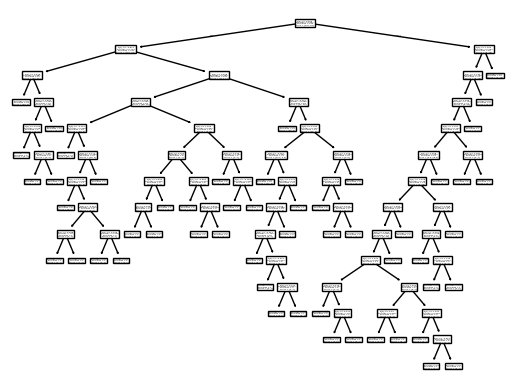

In [16]:
#Checking how our decision tree as build

import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(grid.best_estimator_)
plt.show()

In [17]:
# print best parameter after tuning 
print(grid.best_params_) 
result=grid.cv_results_
print(result)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, grid_predictions)




{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
{'mean_fit_time': array([0.00422077, 0.00499167, 0.01027589, 0.00886059, 0.00914679,
       0.00901465, 0.00195985, 0.00305991, 0.00419974, 0.00777073,
       0.00874953, 0.01023512]), 'std_fit_time': array([0.0021362 , 0.00275525, 0.00556539, 0.00437042, 0.00118039,
       0.00130032, 0.00137588, 0.00212715, 0.00139245, 0.00235417,
       0.00226394, 0.00322882]), 'mean_score_time': array([0.        , 0.        , 0.01582565, 0.0194222 , 0.01647568,
       0.01730785, 0.        , 0.        , 0.01576858, 0.01593556,
       0.01791544, 0.01637635]), 'std_score_time': array([0.        , 0.        , 0.00839906, 0.00285347, 0.0018082 ,
       0.00048287, 0.        , 0.        , 0.00172543, 0.00135986,
       0.00279149, 0.00152034]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                   'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                   'entropy'],
 

In [18]:

from sklearn.metrics import f1_score
f1_macro=f1_score(Y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}: 0.9017630740307678


In [19]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[81  4]
 [ 9 40]]


In [20]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        85
           1       0.91      0.82      0.86        49

    accuracy                           0.90       134
   macro avg       0.90      0.88      0.89       134
weighted avg       0.90      0.90      0.90       134



In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,grid.predict_proba(X_test)[:,1])


0.8846338535414165

In [22]:
table=pd.DataFrame.from_dict(result)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004221,0.002136,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.004992,0.002755,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.010276,0.005565,0.015826,0.008399,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.826263,0.868752,0.832483,0.865054,0.903610,0.859232,0.027916,2
3,0.008861,0.004370,0.019422,0.002853,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.829615,0.828959,0.813179,0.906166,0.869709,0.849525,0.033929,4
4,0.009147,0.001180,0.016476,0.001808,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.782557,0.907177,0.813179,0.906166,0.867097,0.855235,0.049967,3
5,0.009015,0.001300,0.017308,0.000483,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.887346,0.813511,0.720804,0.924528,0.847020,0.838642,0.069765,6
6,0.001960,0.001376,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.003060,0.002127,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.004200,0.001392,0.015769,0.001725,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.867478,0.831253,0.833323,0.943699,0.885265,0.872204,0.041215,1
9,0.007771,0.002354,0.015936,0.001360,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.905342,0.868752,0.722755,0.710831,0.849057,0.811347,0.079378,8


In [23]:
age_input=float(input("Age:"))
salary_input=float(input("saalry:"))
sex_male_input=int(input("Sex Male 0 or 1:"))

Age: 30
saalry: 60000
Sex Male 0 or 1: 0


In [24]:
Future_Prediction=grid.predict([[age_input,salary_input,sex_male_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[1]
